# Inicio

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Mapear arquivos ocultos (.ipny)
def filter_hidden_folders(folder_list):
    return [folder for folder in folder_list if not folder.startswith('.')]

In [ ]:
# Caminho para os dados do dataset e o reescalador de imagens

xray_directory = 'font_results/normal'

xray_classes = filter_hidden_folders(os.listdir(xray_directory))  # Filtra pastas ocultas
print(os.listdir(xray_directory))
print(len(os.listdir(xray_directory)))
print(os.listdir(xray_directory))

In [ ]:
from tensorflow.keras import layers, models

# Definindo o modelo
model = Sequential()

# Definir parâmetros
input_shape = (180, 100, 1)  # Imagem 180x100, 1 canal (grayscale)
num_classes = 53  # 26 letras maiúsculas, 26 minúsculas, + 1 "null"

# Primeira camada de convolução e pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda camada de convolução e pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Terceira camada de convolução e pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Quarta camada de convolução e pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Camada de flatten
model.add(layers.Flatten())

# Camadas densas (fully connected)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Evitar overfitting

# Camada de saída
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Compilar o modelo
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Resumo do modelo
model.summary()


In [ ]:
# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

In [ ]:
# Salvar o arquivo de treinamento em diferentes epocas

# Nome/caminho do arquivo que sera salvo
filepath = "weights_normal_original.keras" 
#filepath = "weights_normal_original.keras" 

# Define os parametros para atualizar o arquivo final
# ModelCheckpoint(nome_do_arquivo, monitor = 'parametro a ser alalisado', verbose = 1 (imprimir no console quando arquivo for salvo), save_best_only = True, mode = 'min' (objetivo minimizar perda))
checkpoint = ModelCheckpoint(filepath, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')

# Cria uma lista que contém o ModelCheckpoint configurado usado durante o treinamento
callbacks_list = [checkpoint]

In [ ]:
# Gerenciador de imagem para pre processamento
# Aumentar a base de dados 

train_datagen = ImageDataGenerator(
# Transforma os valores de pixel de (0-255 ->0.0 - 1.0 )  
    rescale=1. / 255,
# Aplica zoom aleatório às imagens dentro do intervalo especificado (0.2 -> 20%)
    zoom_range=0.2,
# Realiza uma inversão horizontal aleatória das imagens
    horizontal_flip=True,
#Este parâmetro é usado para dividir automaticamente os dados em conjuntos de treinamento e validação 
    validation_split=0.3
    )



In [ ]:
# Cria critério de parada precoce
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [ ]:

BATCH_SIZE = 50
TARGET_SIZE=(100, 180)
CMODE='grayscale'
CLASS_MODE='categorical'
# Imagens para treinamento
train_generator = train_datagen.flow_from_directory(
    xray_directory,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=CMODE, 
    class_mode=CLASS_MODE,
    shuffle=True,
    subset='training'
)

# Obtenha um lote de imagens do generator
x_batch, y_batch = next(train_generator)

# Visualize algumas imagens geradas com suas respectivas transformações
for i in range(0, 5):  # Mostra as primeiras 5 imagens
    image = x_batch[i]
    plt.imshow(image, cmap = "gray")
    plt.show()

# Imagens para validação
validation_generator = train_datagen.flow_from_directory(
        xray_directory,
        target_size=TARGET_SIZE,
        batch_size=BATCH_SIZE,
        color_mode=CMODE,
        class_mode=CLASS_MODE,
        shuffle=True,
        subset = 'validation'
        )
print(train_generator.class_indices)



In [ ]:
print("Ordem das classes:", train_generator.class_indices)


In [ ]:
# Testar o gerador de dados
for data_batch, labels_batch in train_generator:
    print("Imagens: ", data_batch.shape)
    print("Labels: ", labels_batch.shape)
    break  # Apenas testar um batch


# treinamento do modelo

In [ ]:
history = model.fit(train_generator, epochs = 25, validation_data=validation_generator, callbacks=callbacks_list)

In [ ]:
aux = history
history = history.history.keys() #paramestros de avaliação accuracy, loss

In [ ]:
hist_df = pd.DataFrame(aux.history)
# Salvar o DataFrame em um arquivo CSV
hist_df.to_csv('training_history_normal_original.csv', index=False)
print(hist_df)

In [ ]:

# Exemplo de grafico para ver taxa de acerto por taxa de erro 
plt.plot(aux.history['accuracy'])
plt.plot(aux.history['loss'])
plt.title('Erro e taxa de acerto durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Taxa de acerto e erro')
plt.legend(['Taxa de acerto', 'Erro']);

# Carregar historic de  treinado

In [ ]:
# Carregar os dados do CSV
loaded_history_df = pd.read_csv('training_history.csv')
# Exibir os dados carregados (opcional)
print(loaded_history_df)

In [ ]:
# Plotar a perda de treinamento e validação
plt.plot(loaded_history_df['loss'], label='Loss (train)')
plt.plot(loaded_history_df['val_loss'], label='Loss (validation)')
plt.title('Loss durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotar a precisão de treinamento e validação
plt.plot(loaded_history_df['accuracy'], label='Accuracy (train)')
plt.plot(loaded_history_df['val_accuracy'], label='Accuracy (validation)')
plt.title('Precisão durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()
plt.show()

In [ ]:
#Comparação de LOSS e ACCURACY entre as epocas de treino da rede

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loaded_history_df['loss'], label='train loss')
plt.plot(loaded_history_df['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_history_df['accuracy'], label='train accuracy')
plt.plot(loaded_history_df['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
#Comparação de Loss e Accuracy de redes distintas

import numpy as np

def plot_comparison(results, metric='accuracy'):
    models = list(results.keys())
    final_accuracy = [results[model][metric][-1] for model in models]
    
    plt.figure(figsize=(10, 5))
    plt.bar(models, final_accuracy)
    plt.title(f'Comparação de {metric} entre diferentes redes')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Modelos')
    plt.show()


In [ ]:
#Grafico de curvas para comparação entre redes
def plot_comparison_curves(results, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    
    for model, history in results.items():
        plt.plot(history[metric], label=f'{model} - train')
        plt.plot(history['val_' + metric], '--', label=f'{model} - val')
    
    plt.title(f'Comparação de {metric.capitalize()} entre Redes')
    plt.xlabel('Épocas')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()


In [ ]:
#Matriz Confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')
    plt.show()



In [ ]:
#Boxplot
def plot_boxplot(results, metric='accuracy'):
    data = [history[metric] for history in results.values()]
    labels = results.keys()

    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels)
    plt.title(f'Boxplot de {metric.capitalize()} entre Redes')
    plt.ylabel(metric.capitalize())
    plt.show()


In [ ]:
# defini caminho para pasta de teste
test_directory = 'dataset/test'
# lista contendo os nomes dos arquivos e diretórios presentes no caminho fornecido
os.listdir(test_directory)

In [ ]:
# Mudar a escala das imagens
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_directory(batch_size = 13, directory = test_directory,
                                              shuffle = True, target_size = (256, 256),
                                              class_mode = 'categorical')

evaluate = model.evaluate(test_generator)

len(os.listdir(test_directory))

In [ ]:
# aplica a rede treinada em um conjunto de teste de imagens e armazena os resultados
prediction = []
original = []
image = []

# percorre as subpastas no diretório test_directory, assumindo que cada subpasta contém imagens de uma determinada classe
for i in range(len(os.listdir(test_directory))):
  # percorre os arquivos dentro de cada subpasta e processa cada imagem
  for item in os.listdir(os.path.join(test_directory, str(i))):
    
    #Etapas de processamento de img

    img = cv2.imread(os.path.join(test_directory, str(i), item))
    img = cv2.resize(img, (256, 256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1, 256, 256, 3)

    #rede neural aplicada
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

In [ ]:
accuracy_score(original, prediction)

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, 25):
  axes[i].imshow(image[i])
  axes[i].set_title('Previsão={}\nTrue={}'.format(str(labels_names[prediction[i]]), str(labels_names[original[i]])))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1.2)

In [ ]:
labels_names = {0: 'SoldasCorretas', 1: 'SoldasErradas'}

# Testando se funcionou

(100, 180)


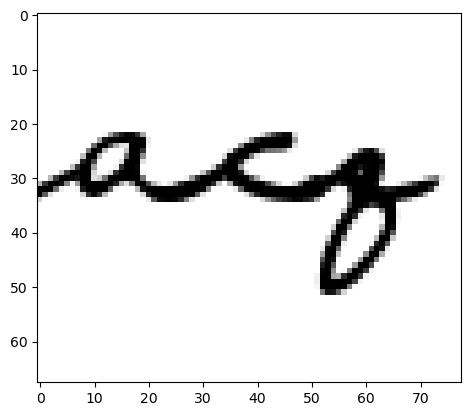

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predição: [[0.0000000e+00 7.4876159e-23 9.8897990e-12 1.2116896e-21 4.2945408e-33
  7.0625353e-03 3.1788636e-21 6.2376909e-16 4.0879714e-30 1.1789421e-23
  1.4737642e-22 1.3672031e-19 6.6633753e-18 0.0000000e+00 7.3428040e-43
  2.0062250e-40 1.7499058e-28 1.1840016e-26 2.9591411e-21 6.9138451e-10
  2.2392422e-26 2.5027191e-42 1.4937842e-42 0.0000000e+00 5.6350104e-29
  7.3227485e-27 5.1601751e-15 4.3365995e-27 1.3846709e-19 8.6312166e-09
  3.0062192e-23 5.9004247e-12 8.5110667e-15 5.4447182e-32 5.5210766e-26
  9.9293572e-01 1.7893067e-06 6.7273791e-11 1.2802425e-15 1.9618179e-44
  1.0930635e-29 2.7515992e-23 4.0569581e-25 1.2009034e-21 3.9773607e-13
  2.2150714e-11 5.8041820e-13 5.2727899e-19 4.1457973e-14 3.8034531e-22
  1.4809791e-13 1.2023900e-26 3.6362434e-11]]
A classe prevista é - 35: i


In [49]:
from keras.models import load_model
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carregar o modelo previamente salvo
model_load = load_model('weights_normal_original.keras')

# Carregar a imagem e convertê-la para um array numpy em escala de cinza
#image = np.array(Image.open("/home/picg/TCC/GeradorBase/font_results/normal/a/a-mas-GrandHotel-Regular.png").convert('L'))
image = np.array(Image.open("/home/picg/TCC/GeradorBase/font_results/normal/c/c-acq-Popsies.png"))
# Redimensionar a imagem para o tamanho esperado pela CNN (supondo 180x100)
temp_resized = cv2.resize(image, (180, 100))

print(temp_resized.shape)
plt.imshow(image, cmap = "gray")
plt.show()
# Adicionar uma dimensão para corresponder ao formato de entrada esperado pelo modelo
final = temp_resized.reshape(1, 180, 100, 1)  # '1' aqui é o batch size

# Normalizar os valores dos pixels para [0, 1]
normalized = final / 255.0

# Fazer a predição com o modelo carregado
prediction = model_load.predict(normalized)

# Exibir o resultado da predição
print("Predição:", prediction)
print(f"A classe prevista é - {predicted_class}: {labels_names[predicted_class]}")


In [50]:
print(normalized.shape)
print(model_load.input_shape)

(1, 180, 100, 1)
(None, 180, 100, 1)


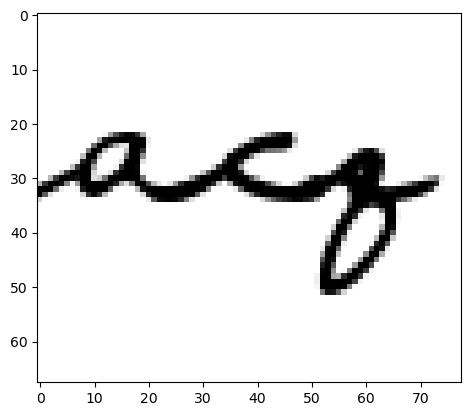

In [51]:
#image = np.array(Image.open("/home/picg/TCC/GeradorBase/font_results/normal/a/a-mam-GrandHotel-Regular.png"))
plt.imshow(image, cmap="gray")

In [53]:
import numpy as np

# Achar a classe com maior probabilidade
predicted_class = np.argmax(prediction).item()
'''
{'.ipynb_checkpoints': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52}
'''

# Definir labels (saidas) 
labels_names = {
    0: "null",
    1: "A",
    2: "B",
    3: "C",
    4: "D",
    5: "E",
    6: "F",
    7: "G",
    8: "H",
    9: "I",
    10: "J",
    11: "K",
    12: "L",
    13: "M",
    14: "N",
    15: "O",
    16: "P",
    17: "Q",
    18: "R",
    19: "S",
    20: "T",
    21: "U",
    22: "V",
    23: "W",
    24: "X",
    25: "Y",
    26: "Z",
    27: "a",
    28: "b",
    29: "c",
    30: "d",
    31: "e",
    32: "f",
    33: "g",
    34: "h",
    35: "i",
    36: "j",
    37: "k",
    38: "l",
    39: "m",
    40: "n",
    41: "o",
    42: "p",
    43: "q",
    44: "r",
    45: "s",
    46: "t",
    47: "u",
    48: "v",
    49: "w",
    50: "x",
    51: "y",
    52: "z"
}



print(f"A classe prevista é - {predicted_class}: {labels_names[predicted_class]}")


A classe prevista é - 35: i


In [24]:
model_load.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 98, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 8, 128)     │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 53)             │        27,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,881,761 (30.07 MB)

 Trainable params: 2,627,253 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,254,508 (20.04 MB)